In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
cat_data = [d for d in df.columns if df[d].dtype == 'object']
num_data = [d for d in df.columns if df[d].dtype != 'object']
print(cat_data)
print(num_data)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [4]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
df[num_data].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [6]:
df.Ticket.unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [7]:
df1 = df.drop(columns=["Name","Ticket"])
df1.shape

(891, 10)

In [8]:
print(round((df1.isnull().sum()/df1.shape[0])*100,2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [9]:
df2 = df1.drop(columns=["Cabin"])
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [10]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

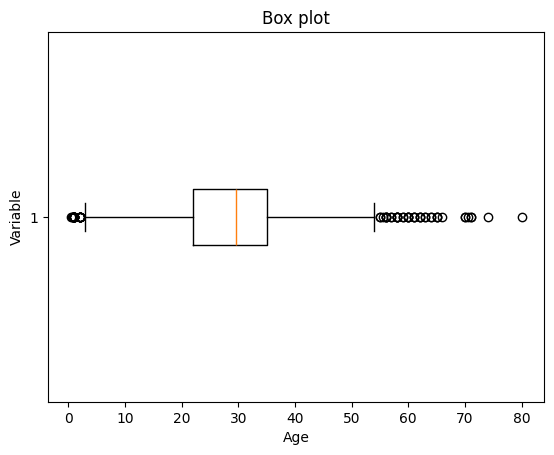

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(df3["Age"], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Box plot")
plt.show()

In [12]:
mean = df3["Age"].mean()
std = df3['Age'].std()
print(std)
print(mean)

12.968346294351779
29.642092696629216


In [13]:
lower_bound = mean - std*2
upper_bound = mean + std*2
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]
print(lower_bound)
print(upper_bound)


3.7054001079256587
55.57878528533277


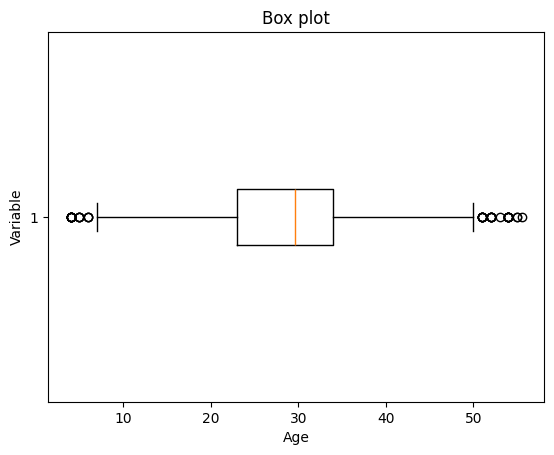

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(df4["Age"], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Box plot")
plt.show()

In [15]:
x = df3[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = df3["Survived"]
print(x)
print(y)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.642093      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
num_col = [d for d in x.columns if x[d].dtype != 'object']

x1=x

x1[num_col] = scaler.fit_transform(x1[num_col])
x1.head()

C:\Users\cheta\AppData\Local\Temp\ipykernel_34788\3155098352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col] = scaler.fit_transform(x1[num_col])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [17]:
import numpy as np

print(num_col)
outlier_percentage = {}

for col in num_col:
    col_data = df[col]
    q1 = np.percentile(col_data, 25)
    q3 = np.percentile(col_data, 75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # Boolean mask for outliers
    outliers_mask = (col_data < lower) | (col_data > upper)
    outlier_count = outliers_mask.sum()
    outlier_percentage[col] = (outlier_count / len(col_data)) * 100

    print(f"Count of outliers in column '{col}': {outlier_count}")
    print(f"Percentage of outliers in column '{col}': {outlier_percentage[col]:.2f}%")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    print(f"Outlier data:\n{col_data[outliers_mask].values}")
    print("\n==============================================\n")


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Count of outliers in column 'Pclass': 0
Percentage of outliers in column 'Pclass': 0.00%
Lower bound: 0.5
Upper bound: 4.5
Outlier data:
[]


Count of outliers in column 'Age': 0
Percentage of outliers in column 'Age': 0.00%
Lower bound: nan
Upper bound: nan
Outlier data:
[]


Count of outliers in column 'SibSp': 46
Percentage of outliers in column 'SibSp': 5.16%
Lower bound: -1.5
Upper bound: 2.5
Outlier data:
[3 4 3 3 4 5 3 4 5 3 3 4 8 4 4 3 8 4 8 3 4 4 4 4 8 3 3 5 3 5 3 4 4 3 3 5 4
 3 4 8 4 3 4 8 4 8]


Count of outliers in column 'Parch': 213
Percentage of outliers in column 'Parch': 23.91%
Lower bound: 0.0
Upper bound: 0.0
Outlier data:
[1 2 1 5 1 1 5 2 2 1 1 2 2 2 1 2 2 2 3 2 2 1 1 1 1 2 1 1 2 2 1 2 2 2 1 2 1
 1 2 1 4 1 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2
 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 4 1 1 2 2 2 2 2 1 1 1 2 2 1 1 2 2 3 4 1 2 1
 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 4 1 1 2 1 2 1 1 2 5 2 1 1
 1 2 1